In [11]:
import numpy as np
import scipy
from scipy import special
from matplotlib import cm
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook
plt.style.use('seaborn-pastel')

[[  0.   0.   0. ...   0.   0. 100.]
 [  0.   0.   0. ...   0.   0. 100.]
 [  0.   0.   0. ...   0.   0. 100.]
 ...
 [  0.   0.   0. ...   0.   0. 100.]
 [  0.   0.   0. ...   0.   0. 100.]
 [  0.   0.   0. ...   0.   0. 100.]]
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 1.00000000e+02]
 [0.00000000e+00 6.40560315e-05 7.42946050e-05 ... 2.17116743e+00
  1.37698844e+01 1.00000000e+02]
 [0.00000000e+00 8.94084003e-05 1.05979619e-04 ... 3.41429691e+00
  1.85800128e+01 1.00000000e+02]
 ...
 [0.00000000e+00 1.82735916e-02 2.08496427e-02 ... 3.26379270e+00
  1.77132521e+01 1.00000000e+02]
 [0.00000000e+00 4.67990977e-02 4.88288623e-02 ... 2.06376076e+00
  1.15797842e+01 1.00000000e+02]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 1.00000000e+02]]


<IPython.core.display.Javascript object>


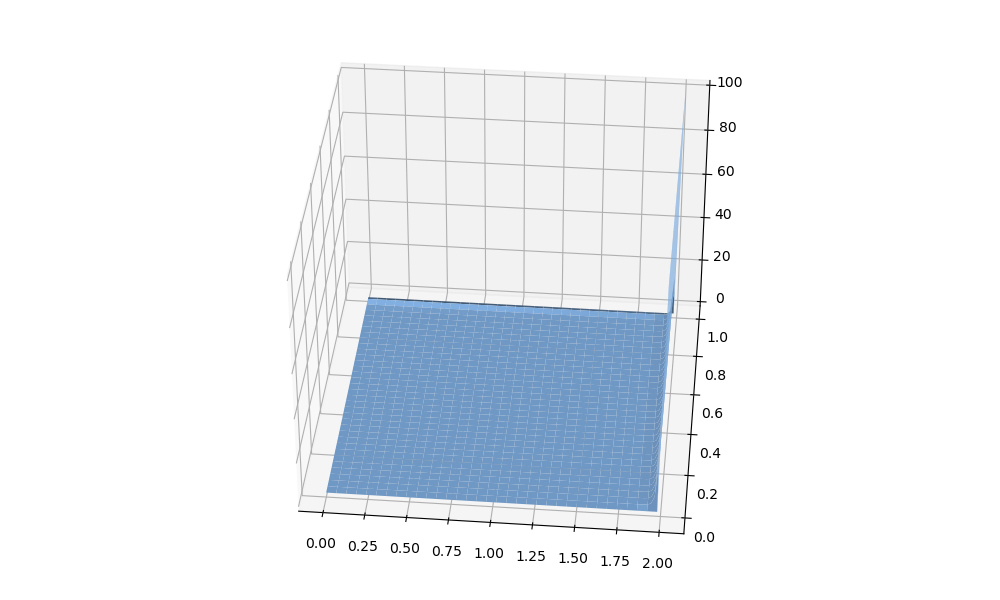

In [39]:
lambd = 100
#f0 = 10
q = 1000
L_x = 2
L_y = 1
m = 100
n = 100
h_x = L_x / m
h_y = L_y / n
x_i = np.arange(0, L_x+h_x, h_x)
y_j = np.arange(0, L_y+h_y, h_y)
r_i = len(x_i)
r_j = len(y_j)
g_y_x = np.zeros([r_j, r_i]) #сетка размером r_j * r_i
Temp = 100
for i in range(r_i): #гран условие при y = 0
    g_y_x[0][i] = 0
for j in range(r_j): #гран условие при x = X
    g_y_x[j][r_i-1] = Temp
for i in range(r_i):
    for j in range(r_j):
        g_y_x[j][i] += 0
print(g_y_x)
alph1 = np.zeros([r_i-1])
beta1 = np.zeros([r_i-1])
alph2 = np.zeros([r_j-1])
beta2 = np.zeros([r_j-1])
#задаем f
def f0(c, x, y, T):
    return c * (1 + x * y * (T + 10))
#задаем лямбду
def lambd_x_y(lambd, x, y):
    return lambd * (1 + x ** 2 * y)
def lambd_m_plus(lambd, x, y):
    return (2 * lambd_x_y(lambd, x, y)*lambd_x_y(lambd, x, y + h_y) / (lambd_x_y(lambd, x, y) + lambd_x_y(lambd, x, y + h_y)))
def lambd_m_minus(lambd, x, y):
    return (2 * lambd_x_y(lambd, x, y)*lambd_x_y(lambd, x, y - h_y) / (lambd_x_y(lambd, x, y) + lambd_x_y(lambd, x, y - h_y)))
def lambd_n_plus(lambd, x, y):
    return (2 * lambd_x_y(lambd, x, y)*lambd_x_y(lambd, x + h_x, y) / (lambd_x_y(lambd, x, y) + lambd_x_y(lambd, x + h_x, y)))
def lambd_n_minus(lambd, x, y):
    return (2 * lambd_x_y(lambd, x, y)*lambd_x_y(lambd, x - h_x, y) / (lambd_x_y(lambd, x, y) + lambd_x_y(lambd, x - h_x, y)))
#задаем беты
def beta_N(lambd, x, y):
    return lambd_m_plus(lambd, x, y) * h_x / h_y
def beta_S(lambd, x, y):
    return lambd_m_minus(lambd, x, y) * h_x / h_y
def beta_W(lambd, x, y):
    return lambd_n_minus(lambd, x, y) * h_y / h_x
def beta_E(lambd, x, y):
    return lambd_n_plus(lambd, x, y) * h_y / h_x
def beta_P(lambd, x, y):
    return beta_N(lambd, x, y) + beta_S(lambd, x, y) + beta_W(lambd, x, y) + beta_S(lambd, x, y)
for s in range(10):
    # продольная прогонка
    for j in range(1,r_j-1):
        #beta_N = lambd * h_x / h_y
        #beta_W = lambd * h_y / h_x
        #beta_S = lambd * h_x / h_y
        #beta_E = lambd * h_y / h_x
        #beta_P = beta_E + beta_N + beta_S + beta_W
        #нет потока и нулевая температура
        alph1[0] = 0
        beta1[0] = g_y_x[j][0]
        for i in range(1,r_i-1):
            alph1[i] = -beta_E(lambd, x_i[i], y_j[j]) / (beta_W(lambd, x_i[i], y_j[j]) * alph1[i - 1] - beta_P(lambd, x_i[i], y_j[j]))
            beta1[i] = (-f0(100, x_i[i], y_j[j], g_y_x[j][i]) * h_x * h_y -beta_N(lambd, x_i[i], y_j[j])*g_y_x[j+1][i] - beta_S(lambd, x_i[i], y_j[j]) * g_y_x[j-1][i] - beta_W(lambd, x_i[i], y_j[j]) * beta1[i-1]) / (beta_W(lambd, x_i[i], y_j[j]) * alph1[i - 1] - beta_P(lambd, x_i[i], y_j[j]))
        for m in range(r_i - 2, 0, -1):
            g_y_x[j][m] = g_y_x[j][m + 1] * alph1[m] + beta1[m]
    # поперечная прогонка   
    for i in range(1,r_i-1):
        alph2[0] = 0
        beta2[0] = g_y_x[r_j-1][i]
        for j in range(1,r_j-2):
            alph2[j] = -beta_N(lambd, x_i[i], y_j[j]) / (beta_S(lambd, x_i[i], y_j[j]) * alph2[j - 1] - beta_P(lambd, x_i[i],y_j[j]))
            beta2[j] = (-f0(100, x_i[i], y_j[j], g_y_x[j][i]) * h_x * h_y -beta_E(lambd, x_i[i], y_j[j])*g_y_x[j][i + 1] - beta_W(lambd, x_i[i], y_j[j]) * g_y_x[j][i - 1] - beta_S(lambd, x_i[i], y_j[j]) * beta2[j-1]) / (beta_S(lambd, x_i[i], y_j[j]) * alph2[j - 1] - beta_P(lambd, x_i[i], y_j[j]))
        g_y_x[r_j-2][i] =  (-f0(100, x_i[i], y_j[j], g_y_x[j][i]) * h_x * h_y - beta_E(lambd, x_i[i], y_j[j])*g_y_x[j][i + 1] - beta_W(lambd, x_i[i], y_j[j]) * g_y_x[j][i - 1] - beta_S(lambd, x_i[i], y_j[j]) * q * h_y / lambd_x_y(lambd, x_i[i], y_j[j])) / (beta_S(lambd, x_i[i], y_j[j]) - beta_P(lambd, x_i[i], y_j[j]))
        for m in range(r_j - 3, 0, -1):
            g_y_x[m][i] = g_y_x[m+1][i] * alph2[m] + beta2[m]
    

    
print(g_y_x)
plt.style.use('_mpl-gallery')
fig = plt.figure(figsize=(10, 6))
axes = fig.add_subplot(projection='3d')
#ax_3d = Axes3D(fig)
xgrid, ygrid = np.meshgrid(x_i, y_j)
axes.plot_surface(xgrid, ygrid, g_y_x)
plt.show() 